# variational inference

Variational inference is a technique used in Bayesian machine learning to **approximate complex probability distributions with simpler and tractable distributions.**

It is particularly useful to approximate **intractable posterior distributions**, 

where exact inference is computationally expensive or impossible.

Variational inference transforms the intractable inference problem into an optimization problem, 

where the objective is to find the best approximation to the true posterior by optimizing the variational parameters $\phi$.

In variational inference, given:

- $x$: Observed data
- $z$: Latent variables
- $p(z|x)$: The true posterior distribution, which is often intractable
- $q_\phi(z|x)$: A simpler, tractable distribution parameterized by $\phi$, used to approximate the true posterior

The goal is to find the optimal parameters $\phi$ that minimize the divergence between the approximate distribution $q_\phi(z|x)$ and the true posterior $p(z|x)$. 

This is often measured using the Kullback-Leibler (KL) divergence:

$$
\phi^* = \arg\min_\phi KL(q_\phi(z|x) || p(z|x))
$$

However, the true posterior $p(z|x)$ is often intractable, so the optimization problem is re-framed by maximizing the **Evidence Lower BOund (ELBO)/variational free energy**, which is a lower bound on the log-evidence $\log p(x)$:

$$
\phi^* = \arg\max_\phi \mathcal{L}(\phi) = \arg\max_\phi \int q_\phi(z|x)\log \frac{p(x|z)p(z)}{q_\phi(z|x)}dz
$$




# Autoencoding Variational Bayes

Autoencoding Variational Bayes is an optimization technique used in Variational Autoencoders (VAEs) to approximate the true posterior distribution.

## ELBO

goal: **maximize** the **evidence lower bound (ELBO)** of the data likelihood w.r.t the **model parameters $\theta$ and the variational parameters $\phi$**.
    
equivalent to minimize reconstruction error/negative log likelihood and minimize KL Divergence

The ELBO is defined as:

$$
\mathcal{L}(\theta, \phi; x) = \underbrace{\mathbb{E}_{q_\phi(z|x)}[\log p_\theta(x|z)]}_\text{log likelihood} - \underbrace{D_{KL}(q_\phi(z|x) || p_\theta(z))}_\text{KL Divergence}
$$

- $x$: Observed data or evidence

- $z$: Latent variables or hypothesis

parameterized by model parameter $\theta$

- $p_\theta(z|x)$: intractable true posterior distribution

- $p_\theta(z)$: Prior distribution of latent variables, 

- $p_\theta(x|z)$: (decoder) Likelihood or generative model

parameterized by **variational parameter** $\phi$

- $q_\phi(z|x)$: (encoder) Variational approximation of the true posterior distribution $p_\theta(z|x)$, a simpler and tractable distribution

**Derivation of ELBO**


The goal is to maximize the log-evidence $\log p_\theta(x)$:

$$
\log p_\theta(x) = \log \int p_\theta(x|z)p_\theta(z)dz
$$

We introduce the variational distribution $q_\phi(z|x)$ and rewrite the log-evidence:

$$
\log p_\theta(x) = \log \int \frac{p_\theta(x|z)p_\theta(z)}{q_\phi(z|x)}q_\phi(z|x)dz
$$

By applying Jensen's inequality:

$$
\log p_\theta(x) \geq \int q_\phi(z|x)\log \frac{p_\theta(x|z)p_\theta(z)}{q_\phi(z|x)}dz = \mathcal{L}(\theta, \phi)
$$

The ELBO $\mathcal{L}(\theta, \phi)$ can be decomposed into two terms:

$$
\mathcal{L}(\theta, \phi) = \int q_\phi(z|x)\log p_\theta(x|z)dz - \int q_\phi(z|x)\log \frac{q_\phi(z|x)}{p_\theta(z)}dz
$$

first term is the reconstruction loss, 

second term is Kullback-Leibler (KL) divergence between the variational distribution $q_\phi(z|x)$ and the prior distribution $p_\theta(z)$. 

because log-evidence is fixed, maximizing ELBO also minimizes KL divergence.

## gradient approximation

To optimize the ELBO, we need to compute the gradients $\nabla_\theta \mathcal{L}(\theta, \phi; x)$ and $\nabla_\phi \mathcal{L}(\theta, \phi; x)$. 

**Monte Carlo (MC) sampling**


We can approximate the gradient of the ELBO w.r.t $\theta$ using Monte Carlo (MC) sampling:

$$
\nabla_\theta \mathcal{L}(\theta, \phi; x) \approx \frac{1}{n} \sum_{i=1}^n \nabla_\theta \log p_\theta(x|z_i)
$$

where $z_i \sim q_\phi(z|x)$ and $n$ is the number of samples. 


**reparameterization trick**

For the gradient w.r.t $\phi$, we can use the reparameterization trick. 

Let $z = g_\phi(\epsilon, x)$, where $\epsilon$ is a random variable with a simple distribution (e.g., standard normal), and $g_\phi(\cdot)$ is a deterministic function. 

Then, we can approximate the gradient with MC sampling as:

$$
\nabla_\phi \mathcal{L}(\theta, \phi; x) \approx \frac{1}{n} \sum_{i=1}^n \nabla_\phi \log p_\theta(x|g_\phi(\epsilon_i, x)) - \nabla_\phi D_{KL}(q_\phi(z|x) || p_\theta(z))
$$

where $\epsilon_i$ is a sample from the distribution of $\epsilon$. 


# variational Autoencoder (VAE)

- variational Autoencoder gets name from its ability to perform variational inference


- VAE is a **generative model**, can generate new data points distributed like original data points

## loss function of VAE

### sampling from dense latent space

- objective = reconstruction loss (push clusters in latent space far away) + KL divergence (push clusters close)

$$
L = \left\| x - \hat x \right\|_2^2 + KL[N(\mu_x, \sigma_x^2), N(\mathbf{0},I_k)] 
$$

- VAE gives each data point in the latent space $\mathbf{z} \sim N(\mu_x, \sigma_x^2)$ an overlapped **buffer zone** (k-D Gaussian ball) to fill the gap region between single data points,

    thus latent space is dense enough for interpolation

    by add a regularization term of **KL divergence**: penalize Gaussian distributions in the latent space from being too far from standard normal distribution $N(\mathbf{0},I_k)$

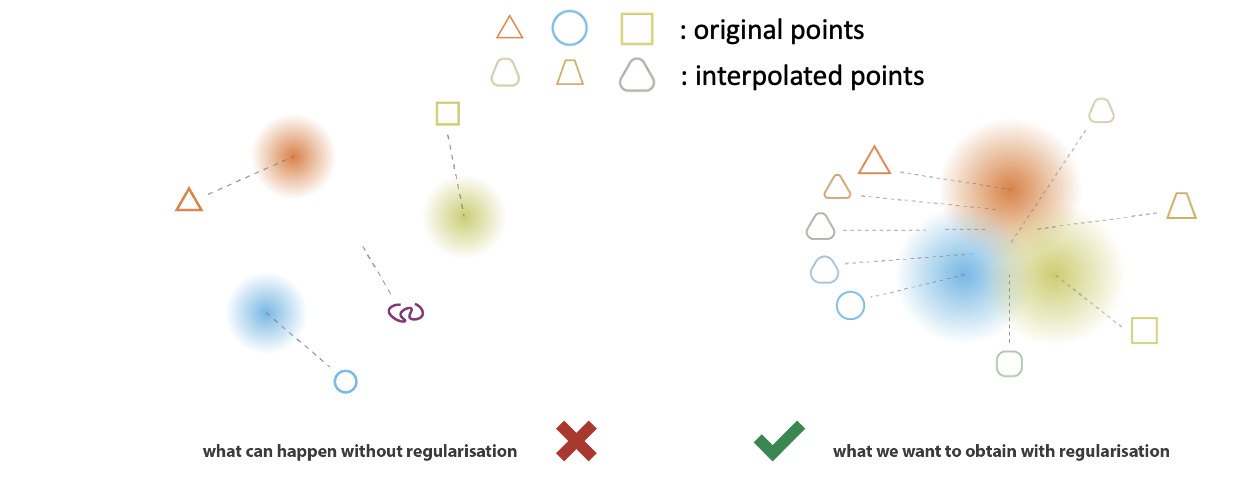

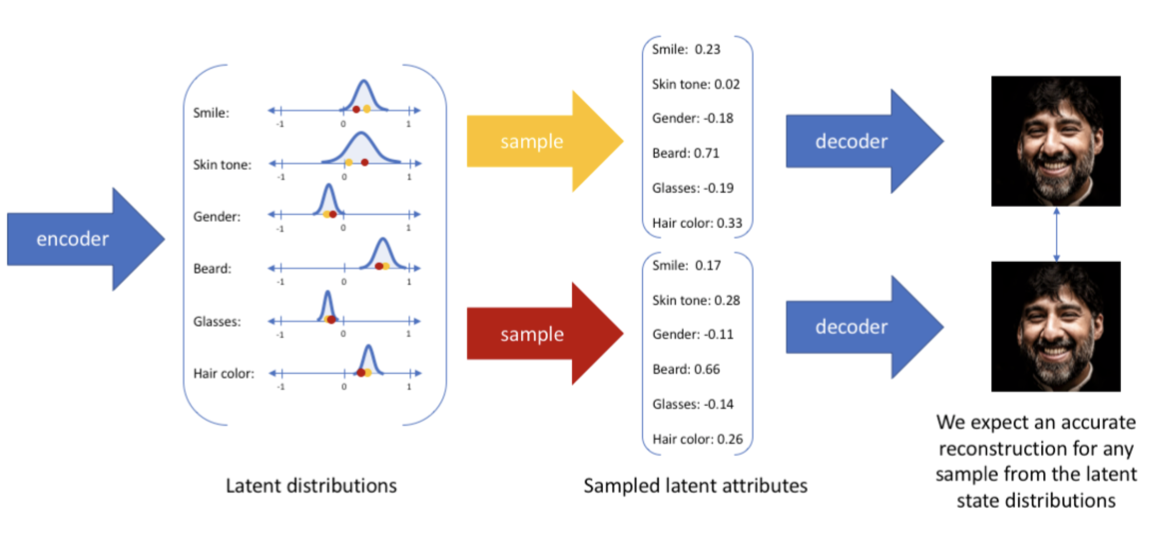

### reparameterization trick

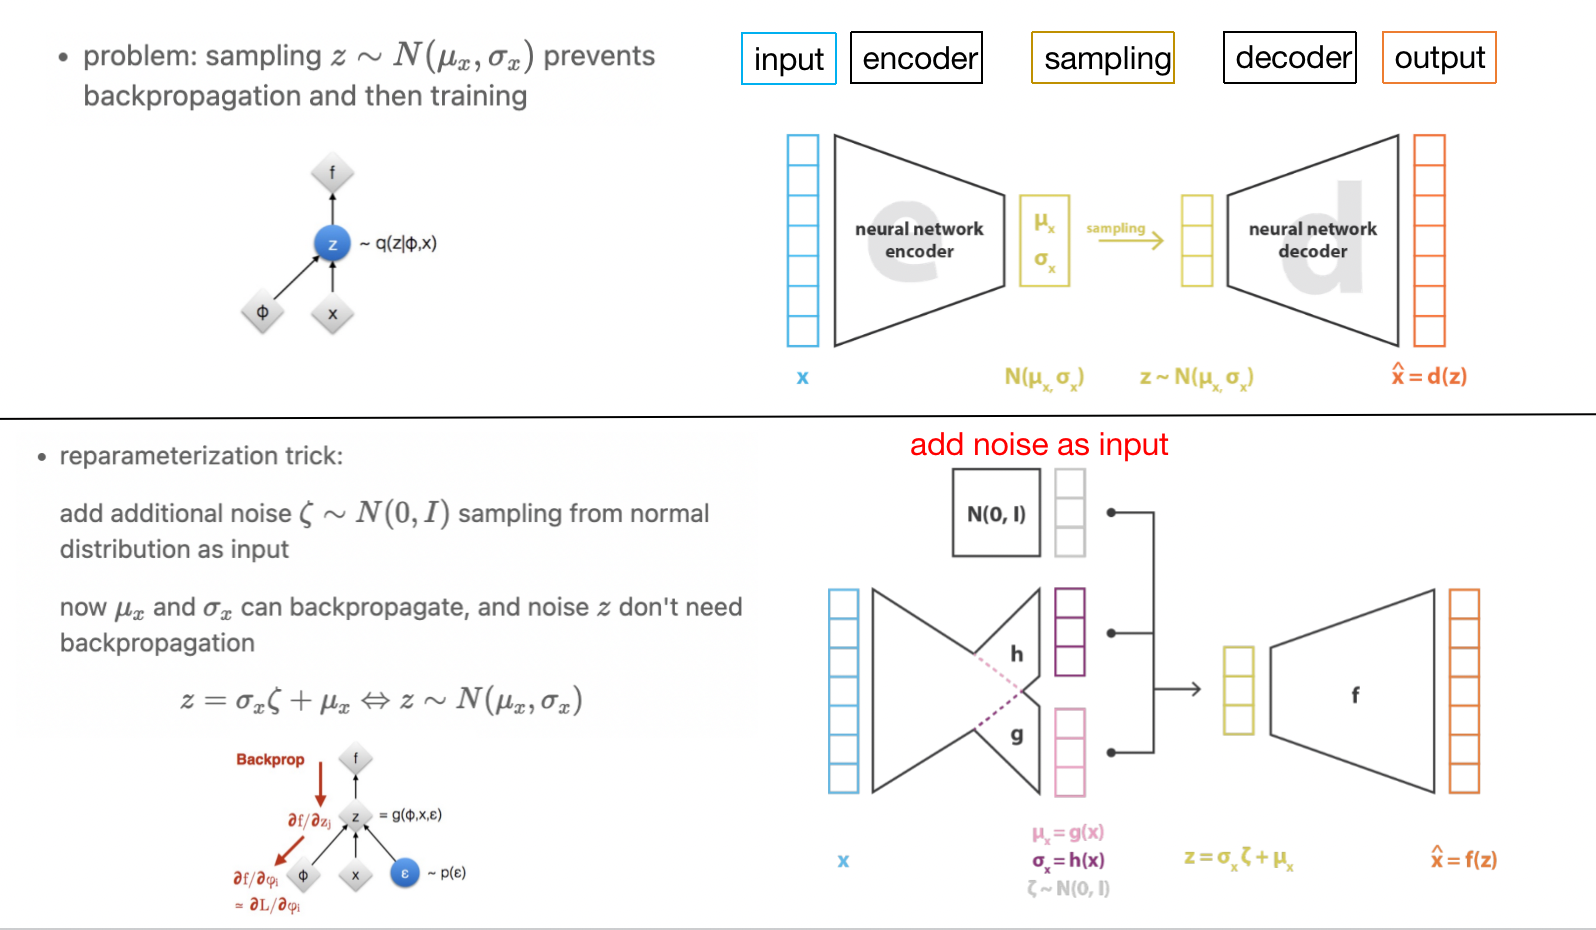

- problem: sampling latent variable $z \sim N(\mu_x, \sigma_x)$ prevents backpropagation and then training


- reparameterization trick: 

    split encoder into 2 parts, one part $h$ encodes mean, another part $g$ encodes standard deviation

    add additional noise $\zeta \sim N(0, I)$ sampling from normal distribution as input 
    
    now $\mu_x$ and $\sigma_x$ can backpropagate, and noise $z$ don't need backpropagation


$$
z = \sigma_x \zeta + \mu_x \Leftrightarrow z \sim N(\mu_x, \sigma_x)
$$



- new loss function
$$
L= \left\| x - \hat x \right\|_2^2 + KL[N(g(x), h(x)), N(0,I)] 
$$